# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#----- Extraction date

date_extraction = "03/28/2020"

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


cloudiness =[]
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
cit = []


In [8]:
print("Beginning Data Rretieval")
print("---------------------------------")

for x, city in enumerate(cities, start=1):      
    try:
        print(f"Processing information for city {x}| {city}")
        response = requests.get(f"{query_url}{city}").json()
        cit.append(response["name"])
        country.append(response["sys"]["country"])
        cloudiness.append(response["clouds"]['all'])
        lng.append(response["coord"]["lon"])
        lat.append(response["coord"]["lat"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        date.append(response["dt"])
    except KeyError:
        print(f"City not found. Skipping...")

print("---------------------------------")
print("Data Rretieval Complete")
print("---------------------------------")

Beginning Data Rretieval
---------------------------------
Processing information for city 1| hilo
Processing information for city 2| thompson
Processing information for city 3| mataura
Processing information for city 4| mount gambier
Processing information for city 5| saryshagan
City not found. Skipping...
Processing information for city 6| whitehorse
Processing information for city 7| busselton
Processing information for city 8| mys shmidta
City not found. Skipping...
Processing information for city 9| provideniya
Processing information for city 10| hermanus
Processing information for city 11| tuktoyaktuk
Processing information for city 12| honningsvag
Processing information for city 13| savonlinna
Processing information for city 14| illoqqortoormiut
City not found. Skipping...
Processing information for city 15| kasongo
Processing information for city 16| suntar
Processing information for city 17| sembe
Processing information for city 18| nanortalik
Processing information for city 1

Processing information for city 172| shelburne
Processing information for city 173| tura
Processing information for city 174| longyearbyen
Processing information for city 175| palabuhanratu
City not found. Skipping...
Processing information for city 176| qui nhon
Processing information for city 177| kleck
City not found. Skipping...
Processing information for city 178| tari
Processing information for city 179| inhambane
Processing information for city 180| guerrero negro
Processing information for city 181| madingou
Processing information for city 182| atuona
Processing information for city 183| chokurdakh
Processing information for city 184| aripuana
Processing information for city 185| isiolo
Processing information for city 186| bambous virieux
Processing information for city 187| grindavik
Processing information for city 188| victoria
Processing information for city 189| necochea
Processing information for city 190| sola
Processing information for city 191| oeiras
Processing informa

Processing information for city 341| lufilufi
Processing information for city 342| coihaique
Processing information for city 343| labuhan
Processing information for city 344| lelystad
Processing information for city 345| kifri
Processing information for city 346| dossor
Processing information for city 347| dukat
Processing information for city 348| teguise
Processing information for city 349| kortkeros
Processing information for city 350| avera
Processing information for city 351| bondo
Processing information for city 352| barawe
City not found. Skipping...
Processing information for city 353| deputatskiy
Processing information for city 354| san cristobal
Processing information for city 355| walvis bay
Processing information for city 356| ahuimanu
Processing information for city 357| basoko
Processing information for city 358| khash
Processing information for city 359| oranjemund
Processing information for city 360| codrington
Processing information for city 361| roura
Processing infor

Processing information for city 512| ardistan
City not found. Skipping...
Processing information for city 513| unye
City not found. Skipping...
Processing information for city 514| mahibadhoo
Processing information for city 515| laon
Processing information for city 516| hasaki
Processing information for city 517| tarko-sale
Processing information for city 518| ossora
Processing information for city 519| port townsend
Processing information for city 520| yate
Processing information for city 521| merauke
Processing information for city 522| sept-iles
Processing information for city 523| alofi
Processing information for city 524| birao
Processing information for city 525| kinna
Processing information for city 526| kirakira
Processing information for city 527| straumen
Processing information for city 528| jining
Processing information for city 529| yar-sale
Processing information for city 530| pakxan
Processing information for city 531| axim
Processing information for city 532| santo estev

In [9]:
#------ Create a dctionary with the retrieved information
data = {
    "City": cit,
    "Cloudiness": cloudiness,
    "Country":country,
    "Date": date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
    
}

In [10]:
info_cities = pd.DataFrame(data=data)
info_cities


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1585696347,69,19.73,-155.09,24.44,2.60
1,Thompson,75,CA,1585695783,67,55.74,-97.86,-7.00,7.70
2,Mataura,12,NZ,1585696348,87,-46.19,168.86,15.56,0.45
3,Mount Gambier,40,AU,1585696349,100,-37.83,140.77,12.00,2.10
4,Whitehorse,75,CA,1585696349,31,60.72,-135.05,-7.22,6.20
...,...,...,...,...,...,...,...,...,...
549,Kyshtovka,83,RU,1585696574,95,56.55,76.63,-4.72,3.35
550,Erdemli,68,TR,1585696486,70,36.60,34.31,14.95,8.65
551,Boa Vista,75,BR,1585696318,49,2.82,-60.67,32.00,4.10
552,Inírida,91,CO,1585696575,81,3.87,-67.92,25.67,0.84


In [11]:
#export the data

info_cities.to_csv(output_data_file)

In [12]:
info_cities.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

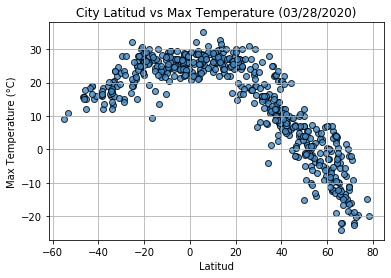

In [13]:
y = info_cities['Max Temp']
x1= info_cities['Lat']

color = "#3F8ED0"
edgecolor="black"
plt.scatter(x1,y, alpha = .8, color=color,edgecolor=edgecolor)
plt.title(f"City Latitud vs Max Temperature ({date_extraction})")
plt.xlabel("Latitud")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.show()

#### Latitude vs. Humidity Plot

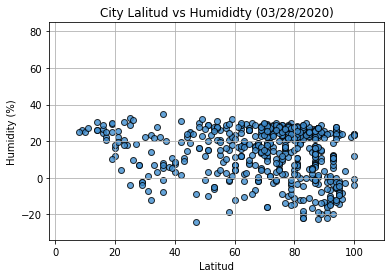

In [14]:
x2 = info_cities['Humidity']
plt.scatter(x2,y,alpha=0.8, color=color,edgecolor=edgecolor)

plt.title(f"City Lalitud vs Humididty ({date_extraction})")
plt.xlabel("Latitud")
plt.ylabel("Humidity (%)")

plt.xmin, plt.xmax, plt.ymin, plt.ymax = plt.axis()
plt.xmin, plt.xmax, plt.ymin, pltymax = plt.axis([x2.min()-10,x2.max()+10, y.min()-10, y.max()+50])

plt.grid(True)
plt.show()


#### Latitude vs. Cloudiness Plot

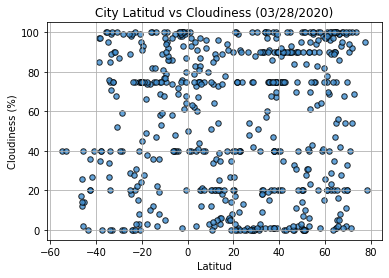

In [15]:

info_cities.plot.scatter("Lat","Cloudiness",color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.title(f"City Latitud vs Cloudiness ({date_extraction})")
plt.xlabel("Latitud")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()

#### Latitude vs. Wind Speed Plot

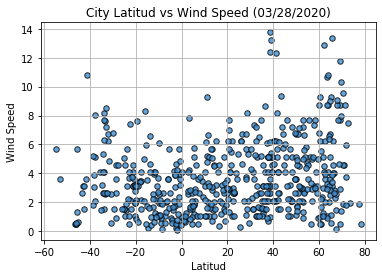

In [16]:
info_cities.plot.scatter("Lat","Wind Speed", color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.grid(True)
plt.xlabel("Latitud")
plt.ylabel("Wind Speed")
plt.title(f"City Latitud vs Wind Speed ({date_extraction})")
plt.show()

## Linear Regression

### Latitud vs Temperature

The r-squared is: -0.7406991719547793


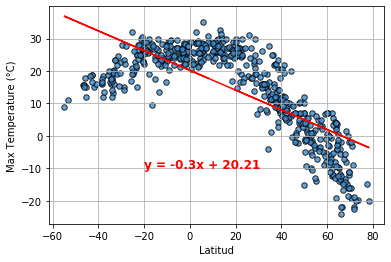

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

y_values=info_cities["Max Temp"]
x_values=info_cities["Lat"]
# Get regression values
(slope,intercept,rvalue1,pvalue,stderr)=linregress(x_values,y_values)

regress_values=x_values*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_values,y_values,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-20,-10),fontsize=12, color = "r", weight="bold")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitud")
plt.grid(True)

#------ Print r square value
print(f'The r-squared is: {rvalue1}')

#------ Showing plot
plt.show()




In this graphic, it is shown that the highest temperatures are located, at the cero latitude, that corresponds to the Equator, and the higher temperatures are distributed approximately 30 degreed above and below that point. The more that you get away from the extremes the higher temperatures.

### Latitude vs Humidity

The r-squared is: -0.041868627564939025


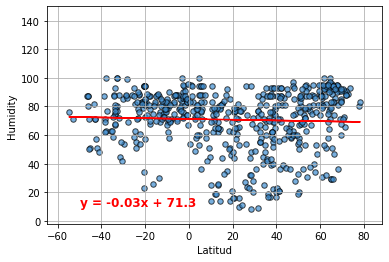

In [18]:
y1_values=info_cities["Humidity"]

# Get regression values
(slope,intercept,rvalue2,pvalue,stderr)=linregress(x_values,y1_values)

regress_values=x_values*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_values,y1_values,color=color,edgecolor=edgecolor,alpha=.7,s=30)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-50,10),fontsize=12, color = "r",weight="bold")
plt.ylabel("Humidity")
plt.xlabel("Latitud")
plt.grid(True)
plt.xmin, plt.xmax, plt.ymin, plt.ymax = plt.axis()
plt.xmin, plt.xmax, plt.ymin, pltymax = plt.axis([x_values.min()-10, x_values.max()+10,
                                                  y1_values.min()-10, y1_values.max()+50])

#------ Print r square value
print(f'The r-squared is: {rvalue2}')

#------ Showing plot
plt.show()


One of the most known premises is: 
> _"Most of the vapor that is in the air evaporated from the surface of the oceans. [...] Also, because warm air can hold more moisture than cool air, locations with warm climates, such as those near the equator, generally have higher humidity than locations with cooler climates, such as those near the poles."_

However, taking into consideration the spread of the data and de r-squared value it seems that there is no significant correlation between the humidity and the latitude. Therefore, based in this premise that the nearest the highest humidity, there are places located at a latitude 60 that are more humid than the ones near the Equator.

### Latitud vs Cloudiness

The r-squared is: 0.03753846197808825


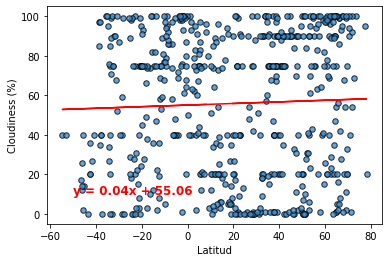

In [19]:
y2_values=info_cities["Cloudiness"]

# Get regression values
(slope,intercept,rvalue3,pvalue,stderr)=linregress(x_values,y2_values)

regress_values=x_values*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_values,y2_values,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-50,10),fontsize=12, color = "r", weight="bold")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalue3}')

#------ Showing plot
plt.show()


According with the NASA:
> _"Clouds  vary with distance from the equator. The cloudiest regions are the tropics and the temperate zones; the subtropics and the polar regions have between 10 and 20 percent less cover. Tropical cloud tops are substantially higher, extending between one and two kilometers higher than cloud tops in the midlatitudes and more than two kilometers higher than the clouds over the subtropics and the poles."_

The above premise it is shown in the plot, there is a less concentration of cloudiness at the extremes (-60,80).

However, one of the most notoriuos facts is that it seems that basen solely in the latitud as a determinant in the cloudiness it it seems that the don't have a close correlation. 

It may be conclude, that the clouds in the globe can vary with location, with time of day, with changing weather and with season.

### Latitud vs Wind Speed

The r-squared is: 0.03753846197808825


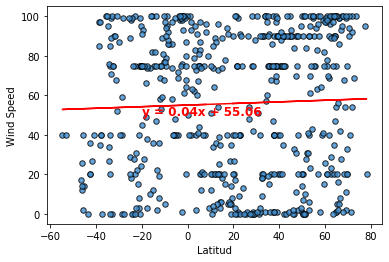

In [28]:
y3_values=info_cities["Cloudiness"]

# Get regression values
(slope,intercept,rvalue4,pvalue,stderr)=linregress(x_values,y3_values)

regress_values=x_values*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_values,y3_values,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_values,regress_values,"r")
plt.annotate(line_eq,(-20,50),fontsize=12, color = "r", weight="bold")
plt.ylabel("Wind Speed")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalue4}')

#------ Showing plot
plt.show()

In this plot, it is described the relationship between the latitude and the Wind Speed have not a close relationships, given  the fact that is widley spread. 

According with some articles, at the Equator, the sun warms the water and land more than it does the rest of the globe. Warm equatorial air rises higher into the atmosphere and migrates toward the poles. This is a low-pressure system. At the same time, cooler, denser air moves over Earth’s surface toward the Equator to replace the heated air. This is a high-pressure system. Winds generally blow from high-pressure areas to low-pressure areas. 

So, the data  it might be affected by the time at was collected.

### Northern vs Southern

In [21]:
# Create Northern and Southern Hemisphere DataFrames
#------- Northern Hemisphere (greater than or equal to 0 degrees latitude) 

northern = info_cities.loc[info_cities["Lat"] >=0]



#------- Southern Hemisphere (less than 0 degrees latitude)
southern = info_cities.loc[info_cities["Lat"]<0]
southern.head()
# Perform a linear regression on temperature vs. latitude


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Mataura,12,NZ,1585696348,87,-46.19,168.86,15.56,0.45
3,Mount Gambier,40,AU,1585696349,100,-37.83,140.77,12.00,2.10
5,Busselton,99,AU,1585696350,75,-33.65,115.33,13.33,2.59
7,Hermanus,34,ZA,1585696350,88,-34.42,19.23,16.11,5.34
11,Kasongo,72,CD,1585696352,78,-4.45,26.67,21.25,0.90


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.9095571279616399


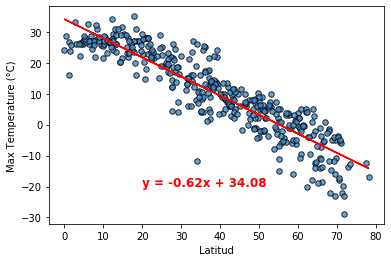

In [88]:
y_north=northern["Max Temp"]
x_north = northern["Lat"]
# Get regression values
(slope,intercept,rvalue4,pvalue,stderr)=linregress(x_north,y_north)

regress_values=x_north*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_north,y_north,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_north,regress_values,"r")
plt.annotate(line_eq,(20,-20),fontsize=12, color = "r", weight="bold")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalue4}')

#------ Showing plot
plt.show()

This plot shows that there is a negative correlation between temperature and latitude; this, because the more that you get away from the Equator (0 lat) the colder it gets.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6206371154162998


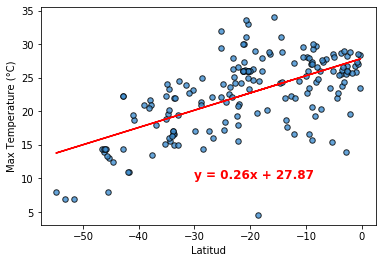

In [94]:
y_south = southern["Max Temp"]
x_south = southern["Lat"]
# Get regression values
(slope,intercept,rvalue5,pvalue,stderr)=linregress(x_south,y_south)

regress_values=x_south*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_south,y_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_south,regress_values,"r")
plt.annotate(line_eq,(-30,10),fontsize=12, color = "r", weight="bold")
plt.ylabel("Max Temperature (°C)")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalue5}')

#------ Showing plot
plt.show()

Quite the opposite with the last plot, this show a positive relationships, the more that you wet close to te equator, the warmer temperatures are found.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.31741304825077576


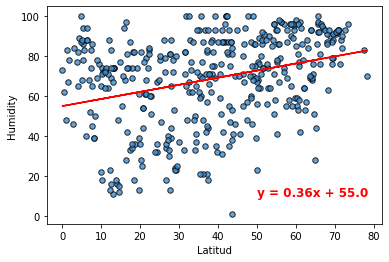

In [96]:
y_hum_north = northern["Humidity"]
# Get regression values
(slope,intercept,rvalueHN,pvalue,stderr)=linregress(x_north,y_hum_north)

regress_values=x_north*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_north,y_hum_north,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_north,regress_values,"r")
plt.annotate(line_eq,(50,10),fontsize=12, color = "r", weight="bold")
plt.ylabel("Humidity")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueHN}')

#------ Showing plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20429248633345923


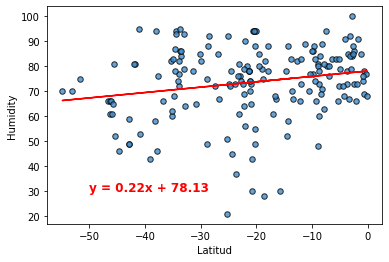

In [98]:
y_hum_south = southern["Humidity"]
# Get regression values
(slope,intercept,rvalueHS,pvalue,stderr)=linregress(x_south,y_hum_south)

regress_values=x_south*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_south,y_hum_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_south,regress_values,"r")
plt.annotate(line_eq,(-50,30),fontsize=12, color = "r", weight="bold")
plt.ylabel("Humidity")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueHS}')

#------ Showing plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2781370753759795


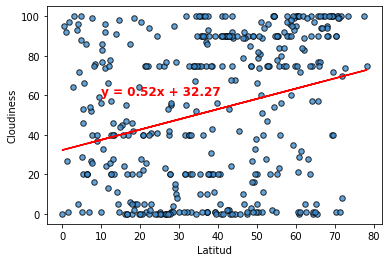

In [106]:
y_cloud_south = northern["Cloudiness"]

# Get regression values
(slope,intercept,rvalueCN,pvalue,stderr)=linregress(x_north,y_cloud_south)

regress_values=x_north*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_north,y_cloud_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_north,regress_values,"r")
plt.annotate(line_eq,(10,60),fontsize=12, color = "r", weight="bold")
plt.ylabel("Cloudiness")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueCN}')

#------ Showing plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3386456417171816


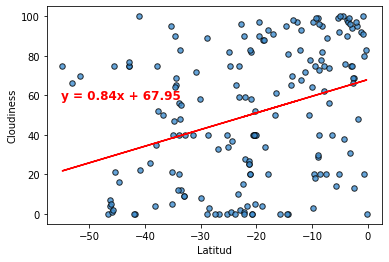

In [118]:
y_cloud_south = southern["Cloudiness"]
# Get regression values
(slope,intercept,rvalueCS,pvalue,stderr)=linregress(x_south,y_cloud_south)

regress_values=x_south*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_south,y_cloud_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_south,regress_values,"r")
plt.annotate(line_eq,(-55,58),fontsize=12, color = "r", weight="bold")
plt.ylabel("Cloudiness")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueCS}')

#------ Showing plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.27539647639648906


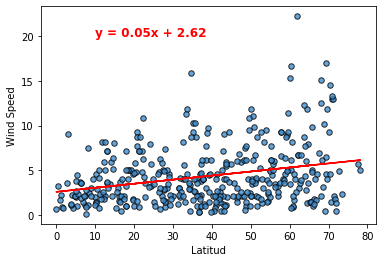

In [121]:
y_ws_south = northern["Wind Speed"]

# Get regression values
(slope,intercept,rvalueWN,pvalue,stderr)=linregress(x_north,y_ws_south)

regress_values=x_north*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_north,y_ws_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_north,regress_values,"r")
plt.annotate(line_eq,(10,20),fontsize=12, color = "r", weight="bold")
plt.ylabel("Wind Speed")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueWN}')

#------ Showing plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.298356148862964


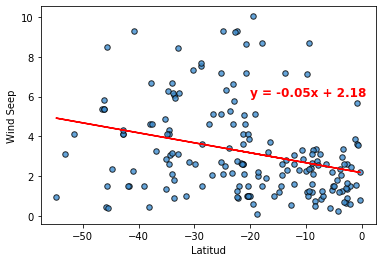

In [127]:
y_ws_south = southern["Wind Speed"]
# Get regression values
(slope,intercept,rvalueWS,pvalue,stderr)=linregress(x_south,y_ws_south)

regress_values=x_south*slope+intercept

# Create line equation string
line_eq = "y = "+ str(round(slope,2))+ "x + " + str(round(intercept,2))

#------ Plotting
plt.scatter(x_south,y_ws_south,color=color,edgecolor=edgecolor,alpha=.8,s=30)
plt.plot(x_south,regress_values,"r")
plt.annotate(line_eq,(-20,6),fontsize=12, color = "r", weight="bold")
plt.ylabel("Wind Seep")
plt.xlabel("Latitud")

#------ Print r square value
print(f'The r-squared is: {rvalueWS}')

#------ Showing plot
plt.show()

### Conclusions

- The wather it is affected by the latitud, however, it is also affected by the time of the day that the data is observed and the season.

- The complex relationships between fronts (high an low pressure) cause different types of wind and weather patterns.

- It may be conclude that the well known premises that the highest temperatures are located near de equator.

